In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
from sklearn.ensemble import BaggingClassifier


1. Import dataset

In [2]:
df = pd.read_csv("C:\\basic_machine_learning_model\\heart failure disease dataset\\heart.csv")

2. Printing Boxplot to see all the outliers

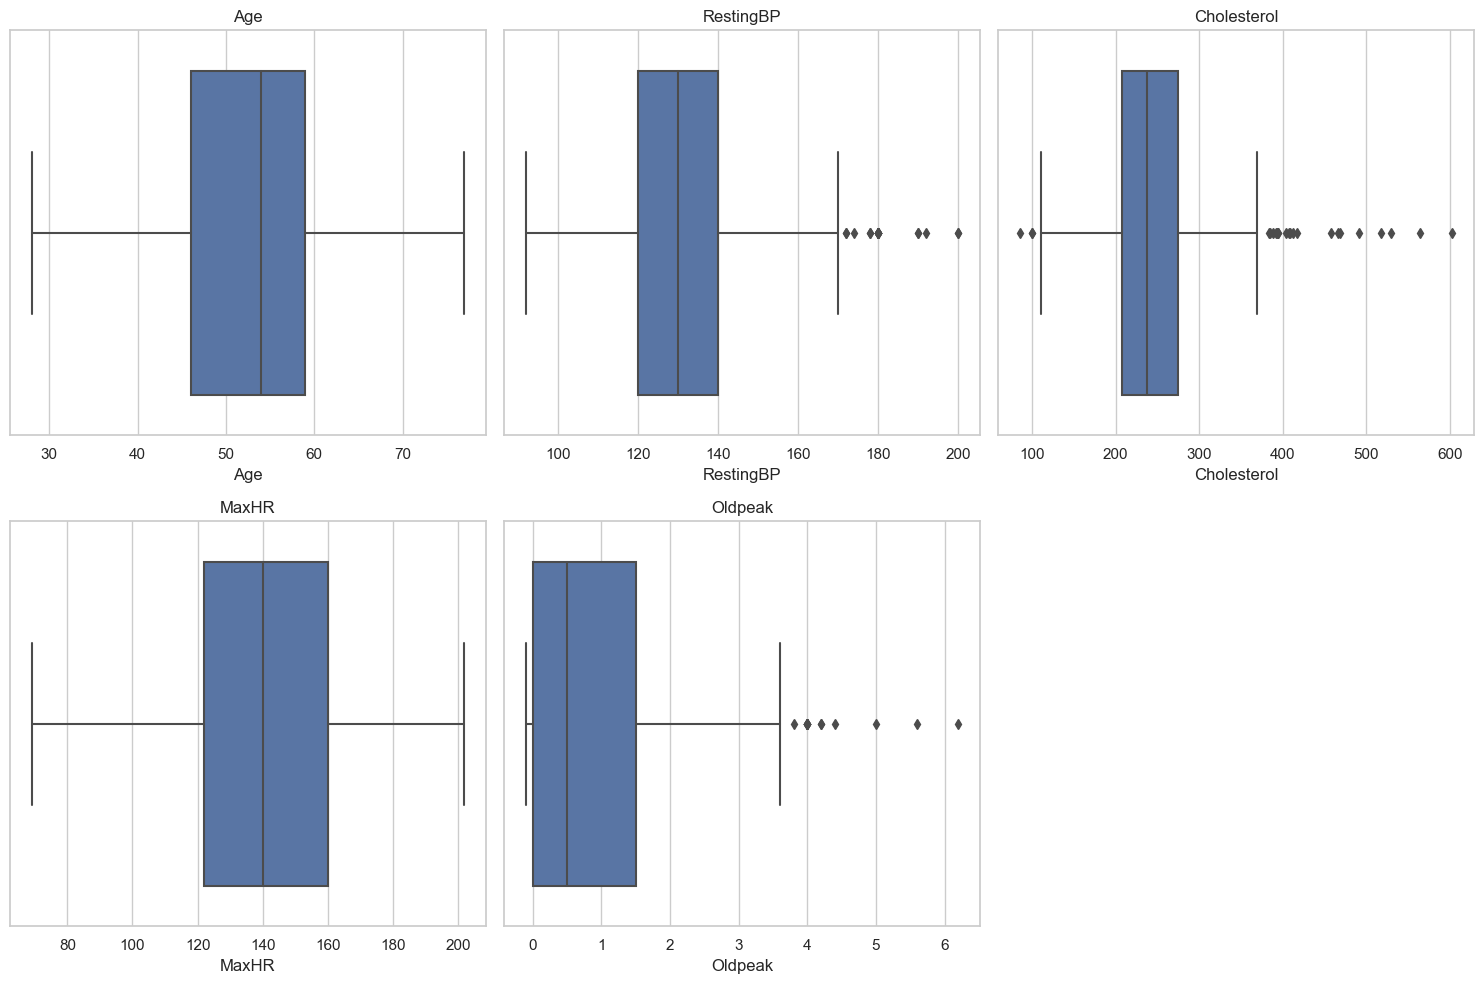

In [5]:
# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Specify the columns you want to plot
selected_columns = ['Age', 'RestingBP', 'Cholesterol',  'MaxHR', 'Oldpeak']

# Loop through each selected column and create a boxplot
for i, column in enumerate(selected_columns):
    plt.subplot(2, 3, i+1)  # Adjust the subplot grid as needed
    sns.boxplot(x=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

3. Remove all Cholesterol and Resting BP = 0 

In [14]:
# Remove rows where 'RestingBP' or 'Cholesterol' equals 0
df = df[(df['RestingBP'] != 0) & (df['Cholesterol'] != 0)]

# Reset the index after removing rows
df = df.reset_index(drop=True)

4. Remove outliers using Z-Score 

In [16]:

# Specify the columns for which you want to remove outliers
columns_to_remove_outliers = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Loop through each selected column and calculate Z-scores
for column in columns_to_remove_outliers:
    z_scores = stats.zscore(df[column])
    
    # Identify outliers based on the Z-score threshold (e.g., 3 or -3)
    outliers = (z_scores > 3) | (z_scores < -3)
    
    # Remove outliers from the DataFrame
    df = df[~outliers]


5. One-hot-Encoding

In [19]:
# Assuming your DataFrame is named 'df'
# If not, replace 'df' with your DataFrame's name

# Specify the categorical columns for which you want to create dummy variables
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ST_Slope','ExerciseAngina']

# Use pd.get_dummies to create dummy variables for the specified columns
df = pd.get_dummies(df, columns=categorical_columns)

# Display the updated DataFrame with dummy variables
print(df)


KeyError: "None of [Index(['Sex', 'ChestPainType', 'RestingECG', 'ST_Slope', 'ExerciseAngina'], dtype='object')] are in the [columns]"

6. Standard Scaler 

In [8]:
# Select numeric columns for standardization
numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the selected numeric columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Display the updated DataFrame with standardized numeric columns
print(df)


          Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
0   -1.352922   0.448814     0.908067          0  1.291046 -0.860461   
1   -0.408187   1.657958    -1.177852          0  0.637886  0.131854   
2   -1.667834  -0.155758     0.793245          0 -1.729817 -0.860461   
3   -0.513158   0.327899    -0.527198          0 -1.321593  0.628011   
4    0.116666   1.053386    -0.890799          0 -0.750078 -0.860461   
..        ...        ...          ...        ...       ...       ...   
741 -0.828069  -1.364903     0.429645          0 -0.341853  0.330317   
742  1.586255   0.690643    -0.929072          1  0.025549  2.513409   
743  0.431578  -0.155758    -2.115558          0 -1.035835  0.330317   
744  0.431578  -0.155758    -0.106187          0  1.372691 -0.860461   
745 -1.562864   0.327899    -1.273536          0  1.331868 -0.860461   

     HeartDisease  Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainType_NAP  \
0               0  False   True              False  ...  

7. Train Test split + SVC Model Standalone + Baggin model with SVC base 

In [9]:

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, random_state=10)
# Create an SVC model
svc_model = SVC()

svc_model.fit(X_train,y_train)
test_accuracy = svc_model.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)# Perform cross-validation and print individual scores
cv_scores = cross_val_score(svc_model, X, y, cv=5) 
# Adjust cv as needed
print("Individual Cross-Validation Scores:", cv_scores)

# Print the mean of the cross-validation scores
mean_cv_score = cv_scores.mean()
print("Mean Cross-Validation Score:", mean_cv_score)


Test Set Accuracy: 0.8901098901098901
Individual Cross-Validation Scores: [0.8630137  0.95205479 0.91034483 0.77241379 0.75862069]
Mean Cross-Validation Score: 0.8512895606991024


In [10]:
# Create a BaggingClassifier with an SVC base estimator
bag_model = BaggingClassifier(
    base_estimator=SVC(),
    n_estimators=100,
    max_samples=0.8,
    oob_score=True,
    random_state=0  # Corrected typo in 'randome_state' to 'random_state'
)

# Fit the BaggingClassifier on the training data
bag_model.fit(X_train, y_train)

# Print the out-of-bag score
print("Out-of-Bag Score:", bag_model.oob_score_)

# Print the accuracy score on the test set
test_accuracy = bag_model.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)

C:\Users\vanhu\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Out-of-Bag Score: 0.8568807339449541
Test Set Accuracy: 0.8736263736263736


In [11]:
bag_model = BaggingClassifier(
    estimator=SVC(),
    n_estimators=100,
    max_samples=0.8,
    oob_score=True,
    random_state=0
)

# Use cross_val_score for BaggingClassifier
cv_scores = cross_val_score(bag_model, X, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.8630137  0.95205479 0.88965517 0.79310345 0.76551724]
Mean Cross-Validation Score: 0.8526688710439301


In [12]:

# Suppress the future warning for the name change
warnings.filterwarnings("ignore", category=FutureWarning)

# Create a standalone DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(random_state=0)

# Use cross_val_score for DecisionTreeClassifier
cv_scores_dt = cross_val_score(decision_tree_model, X, y, cv=5)

# Print cross-validation scores for standalone DecisionTreeClassifier
print("DecisionTreeClassifier Cross-Validation Scores:", cv_scores_dt)
print("Mean Cross-Validation Score:", cv_scores_dt.mean())

# Create a BaggingClassifier with DecisionTreeClassifier as the base estimator
bagging_model_dt = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=0),
    n_estimators=100,
    max_samples=0.8,
    oob_score=True,
    random_state=0
)

# Use cross_val_score for BaggingClassifier with DecisionTreeClassifier
cv_scores_bagging_dt = cross_val_score(bagging_model_dt, X, y, cv=5)

# Print cross-validation scores for BaggingClassifier with DecisionTreeClassifier
print("\nBaggingClassifier with DecisionTreeClassifier Cross-Validation Scores:", cv_scores_bagging_dt)
print("Mean Cross-Validation Score:", cv_scores_bagging_dt.mean())


DecisionTreeClassifier Cross-Validation Scores: [0.80136986 0.8630137  0.84137931 0.65517241 0.74482759]
Mean Cross-Validation Score: 0.7811525743977327

BaggingClassifier with DecisionTreeClassifier Cross-Validation Scores: [0.8630137  0.94520548 0.88275862 0.75862069 0.75172414]
Mean Cross-Validation Score: 0.8402645252716109
